# Credit Card Fraud Detection

Fraud detection is a serious problem of the modern world. The news reports on countless attacks of credit card information being stolen annually. The transactions of fraudulent cards might seem minimal in occurrence but, on a larger scale these small occurrences can cost companies millions in losses. This is where machine learning comes into play learning from the patterns and adapting to new possible schemes. Machine learning can give credit card companies the ability to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


## 1. Importing libraries

In [1]:
import sys
import numpy 
import pandas
import matplotlib
import seaborn 
import scipy
import sklearn 

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy: 1.15.4
Pandas: 0.23.4
Matplotlib: 3.0.2
Seaborn: 0.9.0
Scipy: 1.1.0
Sklearn: 0.20.1


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 2.The Data Set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset  Source: https://www.kaggle.com/mlg-ulb/creditcardfraud 


In [3]:
data =  pd.read_csv('creditcard.csv')

In [4]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
# Data being explored 
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print(data.shape)

(284807, 31)


In [7]:
#print(data.describe())
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V21           V22           V23           V24  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...        1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std        ...        7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min        ...       -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%        ...       -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%        ...       -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%        ...        1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max        ...        2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

% of Valid transactions:  0.9982725143693799
% of Fraud transactions:  0.001727485630620034
All transactions:  284807


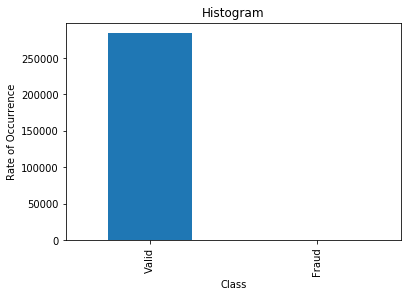

In [8]:
quantity_classes = pd.value_counts(data['Class'], sort = True).sort_index()
quantity_classes.plot(kind = 'bar')
plt.title("Histogram")
plt.xlabel("Class")
plt.ylabel("Rate of Occurrence")
plt.xticks([0,1],["Valid","Fraud"])

print("% of Valid transactions: ", len(data[data.Class == 0])/len(data))
print("% of Fraud transactions: ", len(data[data.Class == 1])/len(data))
print("All transactions: ", len(data))

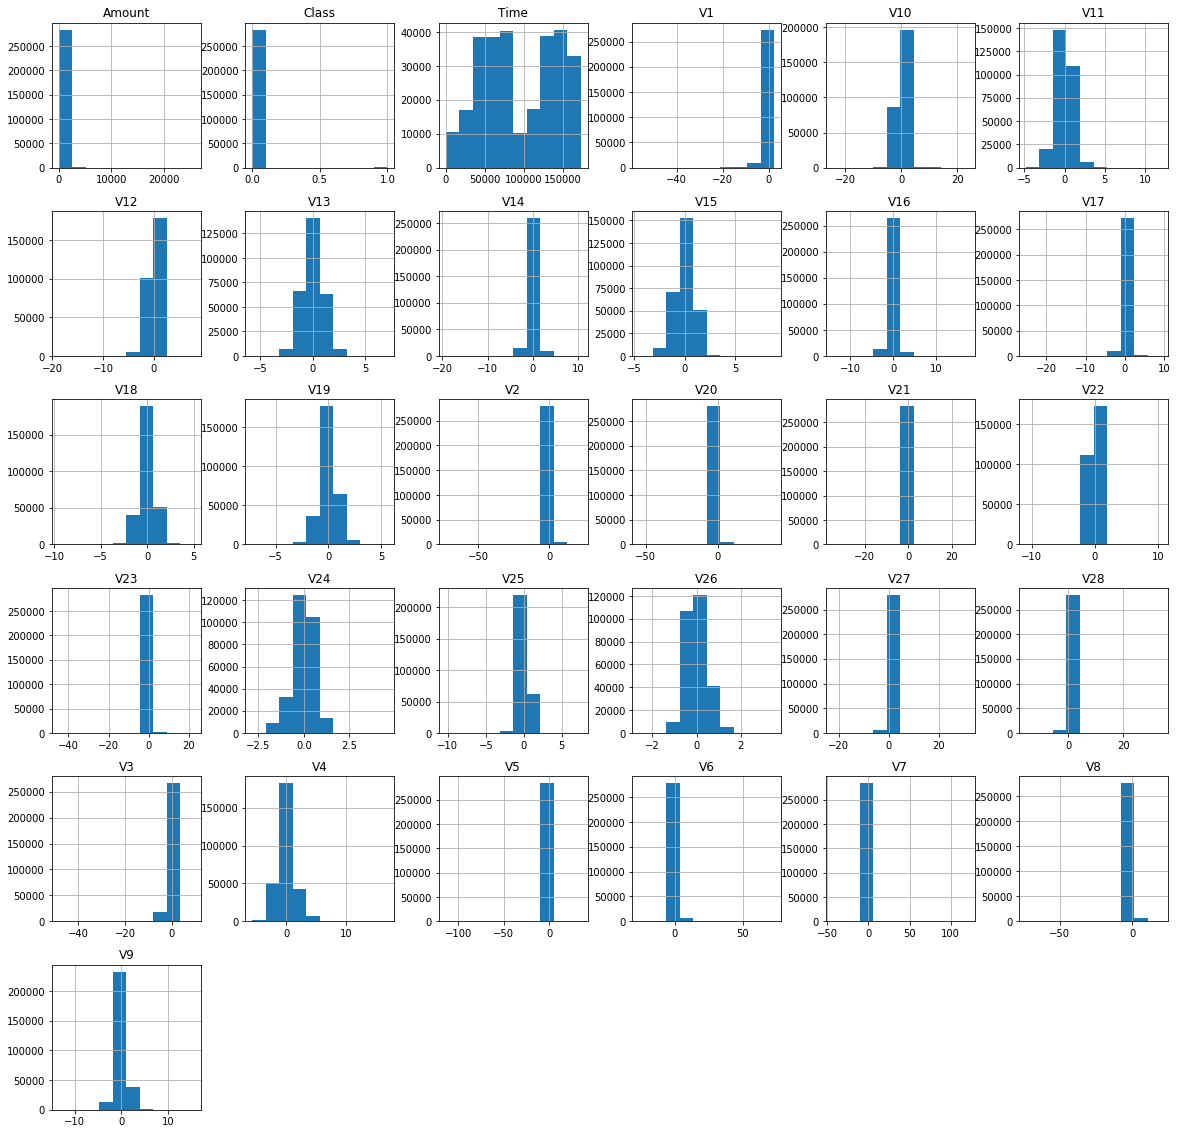

In [9]:
data.hist(figsize = (20, 20))
plt.show()

In [10]:
Fraud = data[data['Class'] == 1]
Valid  = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Instances: {}'.format(len(Fraud)))
print('Valid Instances: {}'.format(len(Valid)))

0.0017304750013189597
Fraud Instances: 492
Valid Instances: 284315


In [11]:
Fraud.shape

(492, 31)

In [12]:
Valid.shape

(284315, 31)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


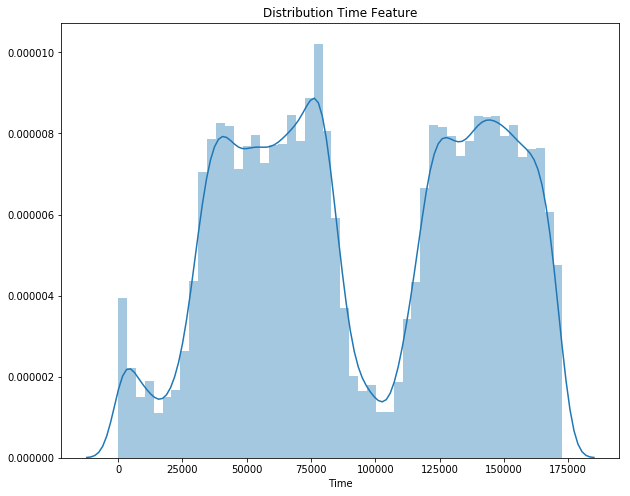

In [13]:
plt.figure(figsize=(10, 8))
plt.title('Distribution Time Feature')
sns.distplot(data.Time)

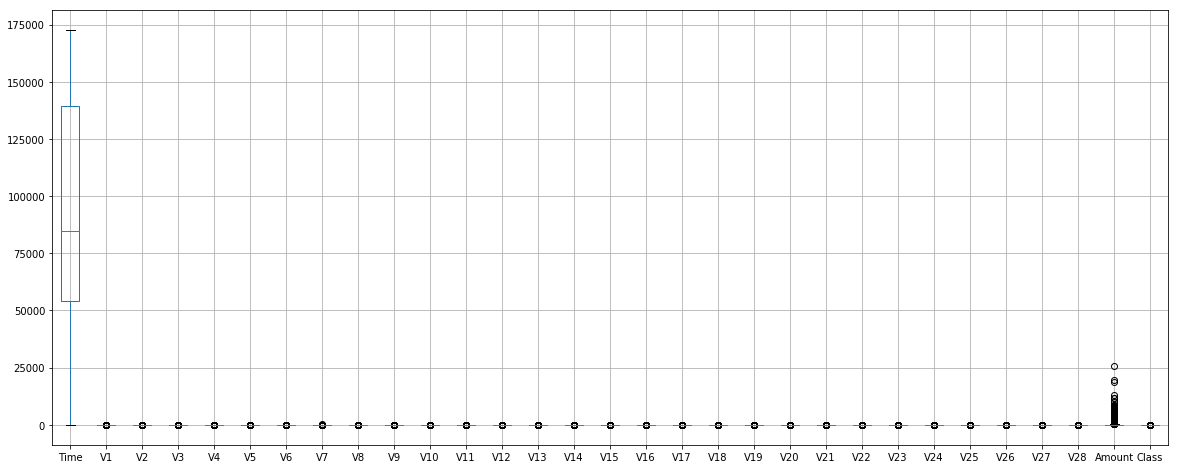

In [14]:
plt.figure(figsize=(20, 8))
data.boxplot()

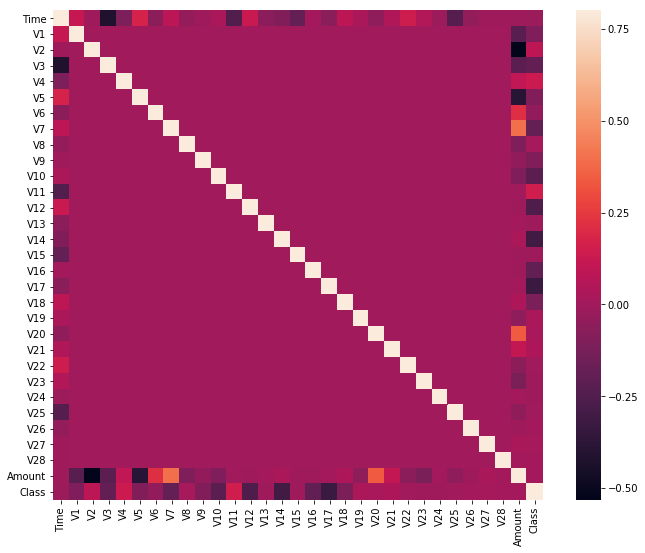

In [15]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [16]:
#Gathering all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove the data we do not want 
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on 
target = "Class"

X = data[columns]
Y = data[target]

#Print shapes 
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


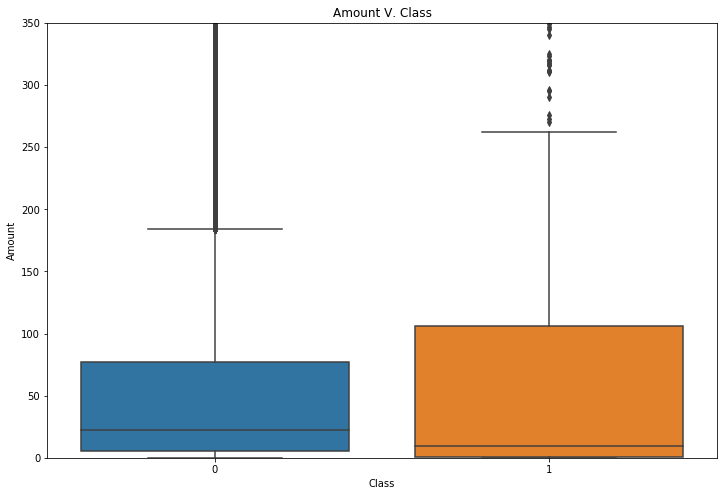

In [17]:
plt.figure(figsize= (12, 8))
ax = sns.boxplot(x = 'Class', y = 'Amount', data = data)
ax.set_ylim([0, 350])
plt.title('Amount V. Class')
plt.show()

# Data Pre-Processing

In [18]:
#Normilization 
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [19]:
# Support Vector Machine
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
# load the iris datasets
dataset = datasets.load_iris()
# fit a SVM model to the data
model = SVC()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

   micro avg       0.99      0.99      0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9     ...           V22       V23       V24       V25  \
0  0.098698  0.363787     ...      0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425     ...     -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654     ...      0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024     ...      0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739     ...      0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  normAmount  
0 -0.189115  0.133558 -0.021053  149.62      0    0.244964  
1  0.125895 -0.008983  0.014724    2.69      0   -0.342475  
2 -0.139097 -0.055353 -0.059752  378.66      0    1.160686  
3 -0.221929  0.062723  0.061458  123.50      0    0.140534  
4  0.502292  0.219422  0.215153   69.99      0   -0.073403  

[5 rows x 32 columns]

In [21]:
#Shuffling data 
data = data.sample(frac=1)
#Fraud Quantity 
fraud_data = data.loc[data['Class'] == 1]
valid_data = data.loc[data['Class'] == 0][:492]
#Pandas Concat function used to rejoins classes
normalized_data = pd.concat([fraud_data, valid_data])
#Shuffling data rows 
latest_data = normalized_data.sample(frac=1, random_state=42) 


In [22]:
latest_data.head()

Time        V1        V2        V3        V4        V5        V6  \
48517    43680.0  1.367997  0.122610 -0.591151 -0.312655  0.406402 -0.305855   
157868  110547.0 -1.532810  2.232752 -5.923100  3.386708 -0.153443 -1.419748   
103310   68594.0  1.050131 -0.666519  1.024995  0.258808 -1.157332  0.083149   
116404   74262.0 -2.250535  2.365755 -2.955491  0.089791 -2.830745 -0.844462   
235634  148476.0 -1.125092  3.682876 -6.556168  4.016731 -0.425571 -2.031210   

              V7        V8        V9     ...           V22       V23  \
48517   0.223879 -0.073662 -0.138659     ...     -1.304854 -0.023505   
157868 -3.878576  1.444656 -1.465542     ...     -0.070838 -0.490291   
103310 -0.714679  0.231723  1.340229     ...     -0.409103  0.067999   
116404 -0.174062 -0.407138  0.174216     ...     -0.466245  0.291105   
235634 -2.650137  1.131249 -2.946890     ...      1.348156 -0.053686   

             V24       V25       V26       V27       V28  Amount  Class  \
48517  -1.001583  0.378474  0.573285 -0.101674 -0.023946    1.00      0   
157868 -0.359983  0.050678  1.095671  0.471741 -0.106667    0.76      1   
103310  0.137716  0.008674  0.968578 -0.035019  0.019531   69.32      0   
116404  0.242567 -1.279094 -1.123534 -0.630977  0.326839  311.28      1   
235634  0.284122 -1.174469 -0.087832  0.718790  0.676216    0.76      1   

        normAmount  
48517    -0.349231  
157868   -0.350191  
103310   -0.076082  
116404    0.891295  
235634   -0.350191  

[5 rows x 32 columns]

# Unsupervised Outlier Detection 
Machine Learning algorithms in action below:<br>

__Local Outlier Factor Algorithm__<br>

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.<br>

*source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html*

__Isolation Forest Algorithm__

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

*source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html*

In [23]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# defining the random states 
state = 1

# defining outlier detection tools to be compared 
classifiers = {
    "Isolation Forest Algorithm": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor Algorithm": LocalOutlierFactor(
    n_neighbors=20,
    contamination=outlier_fraction)}

In [ ]:
# Fitting the model 
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fitting the data and tag outliers
    if clf_name == "Local Outlier Factor Algorithm":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshaping the prediction values to 0 for valid, 1 for Fraud 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Running the classifications 
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
